In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import sklearn_tda as sktda
# Can be downloaded at https://github.com/MathieuCarriere/sklearn-tda
import statmapper as stm
# Can be downloaded at https://github.com/MathieuCarriere/statmapper
from metricmapper import *


%matplotlib inline

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [2]:
def twolayerFC():
    input_shape = (28,28,1)
    hidden_layer_size, num_classes = 400, 10
    initializer = tf.initializers.VarianceScaling(scale=2.0)
    layers = [
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(hidden_layer_size, activation='relu', kernel_initializer = initializer),
        tf.keras.layers.Dense(num_classes, activation='softmax', kernel_initializer = initializer)
    ]
    model = tf.keras.Sequential(layers)
    return model

In [3]:
lr = 1e-3
model = twolayerFC()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = lr, momentum = 0.0, nesterov = True), 
             loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.sparse_categorical_accuracy])
model.fit(X_train, y_train, batch_size=64, epochs=10)
model.evaluate(X_test, y_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/sample - loss: 4.2445 - sparse_categorical_accuracy: 0.8763
Epoch 2/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.5101 - sparse_categorical_accuracy: 0.9287
Epoch 3/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2968 - sparse_categorical_accuracy: 0.9464
Epoch 4/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2016 - sparse_categorical_accuracy: 0.9575
Epoch 5/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1488 - sparse_categorical_accuracy: 0.9653
Epoch 6/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1131 - sparse_categorical_accuracy: 0.9718
Epoch 7/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0899 - sparse_categorical_accuracy: 0.9761
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0726 - spars

[0.4130967020635835, 0.944]

In [18]:
np.random.seed(0)

X_test_re = X_test.reshape(X_test.shape[0],-1)
filters = model.predict(X_test[0:1000])
num_filters = filters.shape[1]
filter_bnds = np.empty((num_filters,2))
filter_bnds[:] = np.nan

resolutions = np.empty(num_filters)
resolutions[:] = 10

gains = 0.1 * np.ones(num_filters)
clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='single', distance_threshold=2000)
clustering.fit(X_test_re[0:1000])

mapper = sktda.MapperComplex(filters=filters, filter_bnds=filter_bnds, colors=filters, resolutions=resolutions, 
                      gains=gains, clustering=clustering, inp="point cloud")
mapper.fit(X_test_re[0:1000])

MapperComplex(clustering=AgglomerativeClustering(affinity='euclidean',
                                                 compute_full_tree='auto',
                                                 connectivity=None,
                                                 distance_threshold=2000,
                                                 linkage='single', memory=None,
                                                 n_clusters=None,
                                                 pooling_func='deprecated'),
              colors=array([[1.2473829e-35, 0.0000000e+00, 1.1734650e-24, ..., 1.0000000e+00,
        6.6122848e-34, 4.5185560e-18],
       [0.0000000e+00, 6.5892501e-25, 1.000000...
        0.0000000e+00, 0.0000000e+00],
       [2.9285873e-05, 6.9188870e-14, 1.7713495e-04, ..., 4.0664896e-04,
        9.9203694e-01, 7.9493917e-04],
       [1.0111094e-19, 1.0825306e-25, 6.1962398e-16, ..., 4.4473719e-02,
        2.7210039e-14, 9.5552069e-01]], dtype=float32),
              gains=array(

<IPython.core.display.Javascript object>


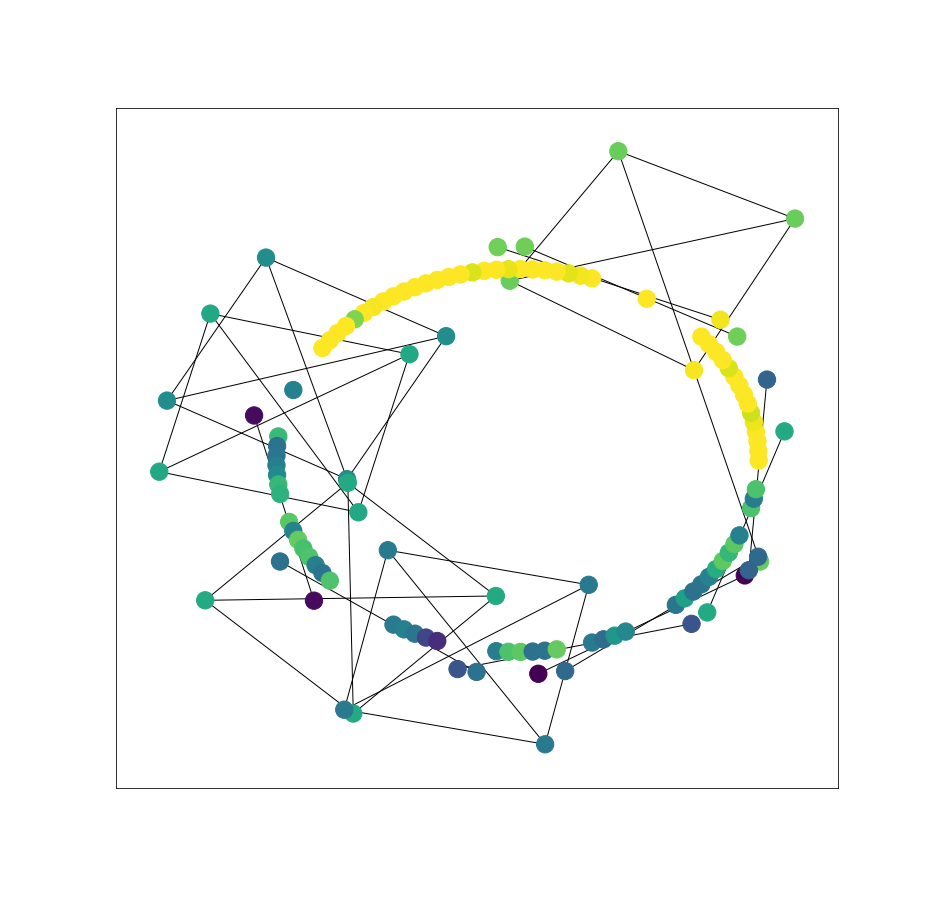

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [19]:
%matplotlib notebook
G = stm.mapper2networkx(mapper)
plt.figure()
nx.draw_networkx(G, with_labels=False, pos=nx.kamada_kawai_layout(G), 
                 node_color=[np.var(mapper.node_info_[name]["colors"]) for name in G.nodes()])

In [12]:
np.random.seed(0)

filters = model.predict(X_test[0:1000])
num_filters = filters.shape[1]
filter_bnds = np.empty((num_filters,2))
filter_bnds[:] = np.nan

resolutions = np.empty(num_filters)
resolutions[:] = 4

gains = 0.2 * np.ones(num_filters)
clustering = KMeans(n_clusters=2)
clustering.fit(X_test_re[0:1000])

mapper = sktda.MapperComplex(filters=filters, filter_bnds=filter_bnds, colors=filters, resolutions=resolutions, 
                      gains=gains, clustering=clustering, inp="point cloud")
X_test_re = X_test.reshape(X_test.shape[0],-1)
mapper.fit(X_test_re[0:1000])

MapperComplex(clustering=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                                max_iter=300, n_clusters=2, n_init=10,
                                n_jobs=None, precompute_distances='auto',
                                random_state=None, tol=0.0001, verbose=0),
              colors=array([[1.2473829e-35, 0.0000000e+00, 1.1734650e-24, ..., 1.0000000e+00,
        6.6122848e-34, 4.5185560e-18],
       [0.0000000e+00, 6.5892501e-25, 1.0000000e+00, ..., 0.000...
       [1.0000000e+00, 0.0000000e+00, 3.5337660e-36, ..., 2.8384170e-24,
        0.0000000e+00, 0.0000000e+00],
       [2.9285873e-05, 6.9188870e-14, 1.7713495e-04, ..., 4.0664896e-04,
        9.9203694e-01, 7.9493917e-04],
       [1.0111094e-19, 1.0825306e-25, 6.1962398e-16, ..., 4.4473719e-02,
        2.7210039e-14, 9.5552069e-01]], dtype=float32),
              gains=array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]),
              inp=None, mask=0,
              resolutions=array([4.

<IPython.core.display.Javascript object>


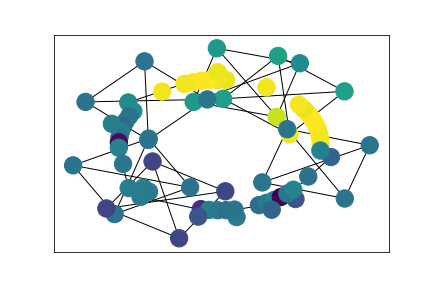

/home/jscott/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [13]:
%matplotlib notebook
G = stm.mapper2networkx(mapper)
plt.figure()
nx.draw_networkx(G, with_labels=False, pos=nx.kamada_kawai_layout(G), 
                 node_color=[np.var(mapper.node_info_[name]["colors"]) for name in G.nodes()])